<a href="https://colab.research.google.com/github/macscheffer/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/Linear_Regression_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import everything you could ever need. ;)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [43]:
# Ukraine Used Car Sale Price Prediction
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.head()

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
0,23,15500.0,0,68,2.5,1,1,2010,1
1,50,20500.0,3,173,1.8,1,1,2011,2
2,50,35000.0,2,135,5.5,3,1,2008,2
3,50,17800.0,5,162,1.8,0,1,2012,0
4,55,16600.0,0,83,2.0,3,1,2013,1


# Predictive Modeling with Linear Regression

## 1.1 Divide the dataset features into an X matrix and y vector ("price" is what we want to predict).

In [44]:
df.dtypes

make              int64
price           float64
body              int64
mileage           int64
engV            float64
engType           int64
registration      int64
year              int64
drive             int64
dtype: object

In [0]:
X = df.drop('price', axis=1)

In [0]:
y = df.price

## 1.2 Split the data into test and train datasets using train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

## 1.3 Use Scikit-Learn to fit a multiple regression model using your training data.

In [48]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 1.4 Report the Intercept and Coefficient Values for the fitted model

In [49]:
lr.intercept_

-2269355.0772314165

In [50]:
lr.coef_

array([  -35.16726588, -1770.98509064,   -40.26859658,   273.03540784,
       -1111.08031708,  4535.06013378,  1140.73124767,  8292.04613874])

In [51]:
print ('Model Intercept', lr.intercept_)
for i in range(X_train.shape[1]):
  print ('Coefficient ' + str(X_train.columns[i]), lr.coef_[i])

Model Intercept -2269355.0772314165
Coefficient make -35.16726588396237
Coefficient body -1770.9850906442816
Coefficient mileage -40.26859658080957
Coefficient engV 273.0354078410832
Coefficient engType -1111.0803170799752
Coefficient registration 4535.06013377585
Coefficient year 1140.7312476652805
Coefficient drive 8292.046138742819


## 1.5 Use the test data to make predictions

In [0]:
pred = lr.predict(X_test)

## 1.6 Calculate and report both the Root-Mean-Square error and $R^2$ for the model. 

In [53]:
print ('RMSE:', mean_squared_error(pred, y_test)**0.5)
print ('R-squared:', lr.score(X_test, y_test))

RMSE: 21394.43524600266
R-squared: 0.29213322373743256


## 1.7 How should we interpret the coefficient corresponding to the "year" feature?

the year coefficient is about 1140.7. as the year in price goes up one the price of the car goes up about 1140 units of currency.

meaning newer model cars are more expensive than older model cars which matches our intuition.

## 1.8 How should we interpret the Root-Mean-Square Error?

The RMSE is a measure of how well we do in our predictions. the lower the RMSE the better.

Another way to interpret it is that its the std deviation unexplained residual distribution of the regression.

both of these aren't ideal interpretations, but it is in the same units as what we are predicting, and we want it to be lower.

## 1.9 How should we interpret the $R^2$?

R-squared is the percentage of variance in our predicted values that is **explained** by our X values.

so our X variables explain about 29% of the variance in the y variable, which is very low.

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [0]:
df['logprice'] = np.log(df.price)

## 2.2 Use scatterplots or seaborn's pairplot function to do the "eyeball test" for non-linearly distributed features.

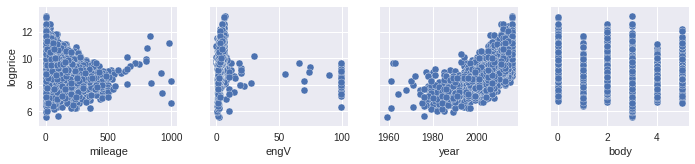

In [55]:
sns.pairplot(data=df, y_vars='logprice', x_vars=['mileage', 'engV', 'year', 'body'])

## 2.3 If appropriate, create any polynomial features. 

In [0]:
# year looks like it has more of an exponential relationship with price.
df['year_squared'] = df.year ** 2

## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [61]:
X = df.drop(['price', 'logprice'], axis=1)
y = df['logprice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

log_lr = LinearRegression()
log_lr.fit(X_train, y_train)

print ('Model Intercept', log_lr.intercept_)
for i in range(X_train.shape[1]):
  print ('Coefficient ' + str(X_train.columns[i]), log_lr.coef_[i])

Model Intercept 5990.6193694514905
Coefficient make -0.0016906329149623952
Coefficient body -0.09395727217396371
Coefficient mileage 0.0006776788228388278
Coefficient engV 0.008233535572905175
Coefficient engType -0.04850023659602642
Coefficient registration 0.6716398999272164
Coefficient year -6.078688030671886
Coefficient drive 0.37388922061845287
Coefficient year_squared 0.0015436462745999635


In [63]:
pred = log_lr.predict(X_test)
print ('RMSE:', mean_squared_error(pred, y_test)**0.5)
print ('R-squared:', log_lr.score(X_test, y_test))

RMSE: 0.5628544021513558
R-squared: 0.6694314006574291


In [0]:
# notice our r-squared increased a lot, even though our RMSE is still not great.

## 2.5 How might we interpret the coefficient on "year" in this new regression model?

Our year coefficient is now confusing. for every year newer on average our price decreases by 6.07%. 
This is proobably because we included year squared in our regression which is positive .001% with much higher values demonstrated below.

In [68]:
df.year.head(5)

0    2010
1    2011
2    2008
3    2012
4    2013
Name: year, dtype: int64

In [69]:
df.year_squared.head(5)

0    4040100
1    4044121
2    4032064
3    4048144
4    4052169
Name: year_squared, dtype: int64

# Gradient Descent

## 3.1 What does Gradient Descent seek to minimize?

Gradient Descent seeks to minimize some 'cost function'. in the example this week the cost function sum of squared errors.

## 3.2 What is the "Learning Rate" and what is its function?

Learning rate is a decreasing function of time.

A better way to think about it would be the rate in which errors are corrected in a Gradient Descent function.

errors are the cost that we are trying to minimize.


the in class example did a great job of explaining it so hear is an example in my own words.

Sebastian: what is 5 times 5?
Mac: 10?
Sebastian: too low.
Mac: 18:
Sebastian: too low
Mac: 23
Sebastian: too low
Mac: 26:
Sebastian: too high
Mac: 25
Sebastian: Correct

the above is a good example. here is an example of too high of a learning rate.
Sebastian: what is 5 times 5?
Mac: 10?
Sebastian: too low.
Mac: 500
Sebastian: too high
Mac: 0
Sebastian: too low
Mac: 400
Sebastian: too high
Mac: 10
Sebastian: too low

and so on.. 

this would take too long or could even possibly diverge from the correct answer of 25 in cases where the learning rate is much too high.


**we want a learning rate that will converge on the correct answer.**


# Model Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [70]:
X = sm.add_constant(X)

model = sm.OLS(y, X.astype(float)).fit(cov_type='HC3')
predictions = model.predict(X) 

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               logprice   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     1870.
Date:                Fri, 22 Feb 2019   Prob (F-statistic):               0.00
Time:                        16:44:25   Log-Likelihood:                -6964.2
No. Observations:                8495   AIC:                         1.395e+04
Df Residuals:                    8485   BIC:                         1.402e+04
Df Model:                           9                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6418.6476    624.441     10.279   

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. Do we have multicollinearity problems?

In [74]:
vif = [(X.columns[i],variance_inflation_factor(X.astype(float).values, i)) for i in range(X.shape[1])]

[print(v) for v in vif]

('const', 2953273039.000897)
('make', 1.060431475161977)
('body', 1.1583527741914774)
('mileage', 1.9368892032947695)
('engV', 1.0100376419582973)
('engType', 1.1547598212322845)
('registration', 1.1085146982201888)
('year', 141693.16571434424)
('drive', 1.1396338223459779)
('year_squared', 141937.91485709895)


[None, None, None, None, None, None, None, None, None, None]

In [0]:
# yes we have multicollinearity problems.
# in general VIF > 10 tells us there is multicollinearity

In [0]:
# for example year and year squared are very similar, and both have vifs > 10